# Testes iniciais

Códigos relevantes para consulta...
* vis.py: C:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\tcgan\lib\metrics\vis.py
* exp.py: C:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\tcgan\lib\exp.py
* eval.py: C:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\tcgan\lib\eval.py
* tcgan.py: C:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\tcgan\model\tcgan\tcgan.py
* base.py: C:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\tcgan\lib\metrics\base.py
* config.py: C:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\tcgan\model\tcgan\config.py
* config.py: C:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\tcgan\lib\config.py

In [1]:
import os
import fire

from mlpy.lib.utils.path import makedirs, tag_path
from mlpy.lib.utils.log import set_logging
from mlpy.lib.tfops.base import tf_keras_set_gpu_allow_growth
from mlpy.configure import DIR_DATA_UCR15
from mlpy.datasets.ucr_uea.data_names import UCR85_DATASETS

from tcgan.lib.exp import Experiment
from configure import DIR_LOG
from tcgan.model.tcgan import TCGAN, TCGANConfig

Using TensorFlow backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\Users\dami_\anaconda3\envs\tcgan\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
# data_name_list = UCR85_DATASETS
data_name_list = ['50words']

model_cfg = dict(acc_threshold_to_train_d=0.75, kernel_size=10)
exp_cfg = dict(use_testset=True, idx_layer=-3)
exp = Experiment(tag, TCGAN, TCGANConfig, DIR_DATA_UCR15, data_name_list, log_dir,
                    model_cfg_kwargs=model_cfg,
                    **exp_cfg)

fire.Fire(exp.run)

09/10 12:03:13 AM, INFO, github_: ****** process dataset 50words
use_testset=True
09/10 12:03:13 AM, INFO, github__50words: ****** configure init ******
09/10 12:03:14 AM, INFO, github__50words: The settings are as follows: 
strides:2
padding:same
initializer:<tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x000001C21CB62DD8>
leak_slope:0.2
logger:<Logger github__50words (INFO)>
log_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words
train_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words\training
eval_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words\evaluation
ckpt_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words\checkpoint
ckpt_prefix:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\0\50words\checkpoint\ckpt
seed:42
np_rs:RandomState(MT19937)
verbose:1
x_shape:(270, 1)
noise_shape:(100,)
noise_method:normal
noise_samp

KeyboardInterrupt: 

# Verificando o Encoder

In [4]:
import numpy as np
from mlpy.lib.data.utils import train_test_split, one_hot_to_dense
import tensorflow as tf
from tcgan.lib.eval import EvaluatorGAN, EvaluatorClf

In [5]:
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\50words\\50words_TRAIN'
data_train = np.genfromtxt(path, delimiter=',', dtype=np.float32)
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\50words\\50words_TEST'
data_test = np.genfromtxt(path, delimiter=',', dtype=np.float32)
print(data_train.shape, data_test.shape)

(450, 271) (455, 271)


In [7]:
# parse
x_tr = data_train[:, 1::]
y_tr = data_train[:, 0].astype(int)
x_te = data_test[:, 1::]
y_te = data_test[:, 0].astype(int)
y_all = np.concatenate([y_tr, y_te])
classes, y_all = np.unique(y_all, return_inverse=True)
n_class = len(classes)
x_tr = x_tr[..., np.newaxis]
x_te = x_te[..., np.newaxis]

In [8]:
# all data can be used in unsupervised learning
x_all = np.vstack([x_tr, x_te])
_, x_te_gan, _, _ = train_test_split(
    x_all, y_all, train_size=0.9, random_state=42, stratify=y_all)
x_tr_gan = x_all  # use all

In [11]:
input_shape = x_tr.shape[1:]
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
model_cfg = TCGANConfig(input_shape, log_dir, logger, **dict(acc_threshold_to_train_d=0.75, kernel_size=10))
evaluator = EvaluatorGAN(model_cfg)

10/23 01:16:48 PM, INFO, github_: ****** configure init ******
10/23 01:16:48 PM, INFO, github_: The settings are as follows: 
strides:2
padding:same
initializer:<tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x00000285C20385F8>
leak_slope:0.2
logger:<Logger github_ (INFO)>
log_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_
train_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\training
eval_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\evaluation
ckpt_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint
ckpt_prefix:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint\ckpt
seed:42
np_rs:RandomState(MT19937)
verbose:0
x_shape:(270, 1)
noise_shape:(100,)
noise_method:normal
noise_sampler:<function random_normal at 0x00000285A323CD08>
batch_size:16
epochs:300
g_lr:0.0002
d_lr:0.0002
g_beta1:0.5
d_beta1:0.5
g_units_base:32
d_units_base:32


In [12]:
model = TCGAN(model_cfg, evaluator)

In [13]:
base_model = model.discriminator

In [19]:
base_model.layers[0]

In [15]:
inputs = base_model.input
idx_layer = -3
base_output = base_model.layers[idx_layer].output
extractor = tf.keras.models.Model(inputs=inputs, outputs=base_output)
extractor.trainable = False

In [16]:
base_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 270, 1)]          0         
_________________________________________________________________
conv_0_conv (Conv1D)         (None, 135, 32)           352       
_________________________________________________________________
conv_0_relu (LeakyReLU)      (None, 135, 32)           0         
_________________________________________________________________
conv_0_dropout (Dropout)     (None, 135, 32)           0         
_________________________________________________________________
conv_1_conv (Conv1D)         (None, 68, 64)            20544     
_________________________________________________________________
conv_1_relu (LeakyReLU)      (None, 68, 64)            0         
_________________________________________________________________
conv_1_dropout (Dropout)     (None, 68, 64)           

In [23]:
model_cfg.d_dropout_rate

0.0

In [17]:
extractor.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 270, 1)]          0         
_________________________________________________________________
conv_0_conv (Conv1D)         (None, 135, 32)           352       
_________________________________________________________________
conv_0_relu (LeakyReLU)      (None, 135, 32)           0         
_________________________________________________________________
conv_0_dropout (Dropout)     (None, 135, 32)           0         
_________________________________________________________________
conv_1_conv (Conv1D)         (None, 68, 64)            20544     
_________________________________________________________________
conv_1_relu (LeakyReLU)      (None, 68, 64)            0         
_________________________________________________________________
conv_1_dropout (Dropout)     (None, 68, 64)           

In [22]:
x_all.shape

(905, 270, 1)

In [21]:
extractor(x_all).shape

TensorShape([905, 17, 256])

# Sines data

In [5]:
import os

import numpy as np

from mlpy.lib.utils.path import makedirs

DIR_DATA = './TimeGANSine'

In [6]:
def sine_data_generation(no, seq_len, dim):
    """ copy from: https://github.com/jsyoon0823/TimeGAN/blob/master/data_loading.py
    Sine data generation.

  Args:
    - no: the number of samples
    - seq_len: sequence length of the time-series
    - dim: feature dimensions

  Returns:
    - data: generated data
  """
    # Initialize the output
    data = list()

    # Generate sine data
    for i in range(no):
        # Initialize each time-series
        temp = list()
        # For each feature
        for k in range(dim):
            # Randomly drawn frequency and phase
            freq = np.random.uniform(0, 0.1)
            phase = np.random.uniform(0, 0.1)

            # Generate sine signal based on the drawn frequency and phase
            temp_data = [np.sin(freq * j + phase) for j in range(seq_len)]
            temp.append(temp_data)

        # Align row/column
        temp = np.transpose(np.asarray(temp))
        # Normalize to [0,1]
        temp = (temp + 1) * 0.5
        # Stack the generated data
        data.append(temp)

    return data


def sine_dim5_len24_random(r=0):  # the primitive data
    seq_len = 24
    no, dim = 10000, 5
    data = sine_data_generation(no, seq_len, dim)
    data = np.stack(data)
    np.save(os.path.join(DIR_DATA, f'sine_dim{dim}_len{seq_len}_r{r}'), data)


def sine_dim1_len100_random(r=0):
    seq_len = 100
    no, dim = 10000, 1
    data = sine_data_generation(no, seq_len, dim)
    data = np.stack(data)
    np.save(os.path.join(DIR_DATA, f'sine_dim{dim}_len{seq_len}_r{r}'), data)

In [7]:
makedirs(DIR_DATA)

# Prepare datasets for for multiple random runs.
for r in range(5):
    sine_dim5_len24_random(r)

for r in range(5):
    sine_dim1_len100_random(r)

# Próximos passos

In [ ]:
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
# data_name_list = UCR85_DATASETS
data_name_list = ['50words']

model_cfg = dict(acc_threshold_to_train_d=0.75, kernel_size=10)
exp_cfg = dict(use_testset=True, idx_layer=-3)
exp = Experiment(tag, TCGAN, TCGANConfig, DIR_DATA_UCR15, data_name_list, log_dir,
                    model_cfg_kwargs=model_cfg,
                    **exp_cfg)

fire.Fire(exp.run)

In [2]:
import numpy as np
from mlpy.lib.data.utils import train_test_split, one_hot_to_dense
import tensorflow as tf
from tcgan.lib.eval import EvaluatorGAN, EvaluatorClf

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\Users\dami_\anaconda3\envs\tcgan\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\50words\\50words_TRAIN'
data_train = np.genfromtxt(path, delimiter=',', dtype=np.float32)
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\50words\\50words_TEST'
data_test = np.genfromtxt(path, delimiter=',', dtype=np.float32)
print(data_train.shape, data_test.shape)

(450, 271) (455, 271)


In [8]:
# parse
x_tr = data_train[:, 1::]
y_tr = data_train[:, 0].astype(int)
x_te = data_test[:, 1::]
y_te = data_test[:, 0].astype(int)
y_all = np.concatenate([y_tr, y_te])
classes, y_all = np.unique(y_all, return_inverse=True)
n_class = len(classes)
x_tr = x_tr[..., np.newaxis]
x_te = x_te[..., np.newaxis]

In [9]:
# all data can be used in unsupervised learning
x_all = np.vstack([x_tr, x_te])
_, x_te_gan, _, _ = train_test_split(
    x_all, y_all, train_size=0.9, random_state=42, stratify=y_all)
x_tr_gan = x_all  # use all

In [10]:
input_shape = x_tr.shape[1:]
# input_shape = x_tr_gan.shape
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
model_cfg = TCGANConfig(input_shape, log_dir, logger, **dict(acc_threshold_to_train_d=0.75, kernel_size=10))
evaluator = EvaluatorGAN(model_cfg)

09/10 12:07:18 AM, INFO, github_: ****** configure init ******
09/10 12:07:19 AM, INFO, github_: The settings are as follows: 
strides:2
padding:same
initializer:<tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x00000177DBEA8C50>
leak_slope:0.2
logger:<Logger github_ (INFO)>
log_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_
train_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\training
eval_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\evaluation
ckpt_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint
ckpt_prefix:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint\ckpt
seed:42
np_rs:RandomState(MT19937)
verbose:1
x_shape:(270, 1)
noise_shape:(100,)
noise_method:normal
noise_sampler:<function random_normal at 0x00000177BD0A5B70>
batch_size:16
epochs:300
g_lr:0.0002
d_lr:0.0002
g_beta1:0.5
d_beta1:0.5
g_units_base:32
d_units_base:32


In [11]:
model = TCGAN(model_cfg, evaluator)
model.fit(x_tr_gan, x_te_gan)
tf.keras.backend.clear_session()

09/10 12:07:25 AM, INFO, github_: Generator's summary: 
09/10 12:07:25 AM, INFO, github_: Model: "functional_1"
09/10 12:07:25 AM, INFO, github_: _________________________________________________________________
09/10 12:07:25 AM, INFO, github_: Layer (type)                 Output Shape              Param #   
09/10 12:07:25 AM, INFO, github_: =================================================================
09/10 12:07:25 AM, INFO, github_: input_1 (InputLayer)         [(None, 100)]             0         
09/10 12:07:25 AM, INFO, github_: _________________________________________________________________
09/10 12:07:25 AM, INFO, github_: dense_0_dense (Dense)        (None, 4352)              439552    
09/10 12:07:25 AM, INFO, github_: _________________________________________________________________
09/10 12:07:25 AM, INFO, github_: dense_0_norm (BatchNormaliza (None, 4352)              17408     
09/10 12:07:25 AM, INFO, github_: ______________________________________________________

In [5]:
import matplotlib.pyplot as plt

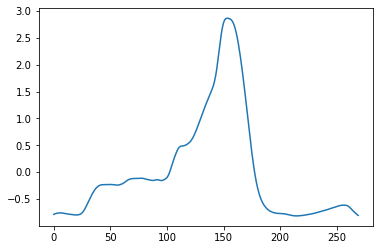

In [14]:
plt.plot(x_all[10,:])

In [19]:
x_fake = model.generate_data(10).reshape(10,270)

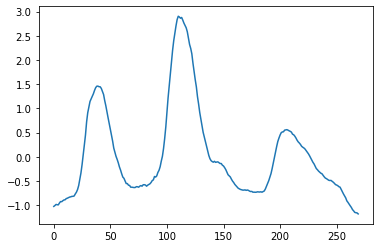

In [23]:
plt.plot(x_fake[0,:])

# Treinando sines

In [32]:
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\TimeGANSine\\sine_dim1_len100_r4.npy'
data = np.load(path).reshape(10000,100)

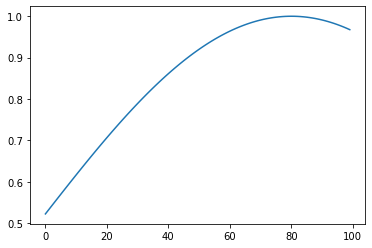

In [38]:
plt.plot(data[10,:])

# Exp FISH

In [141]:
import os
import fire

from mlpy.lib.utils.path import makedirs, tag_path
from mlpy.lib.utils.log import set_logging
from mlpy.lib.tfops.base import tf_keras_set_gpu_allow_growth
from mlpy.configure import DIR_DATA_UCR15
from mlpy.datasets.ucr_uea.data_names import UCR85_DATASETS

from tcgan.lib.exp import Experiment
from configure import DIR_LOG
from tcgan.model.tcgan import TCGAN, TCGANConfig

import numpy as np
from mlpy.lib.data.utils import train_test_split, one_hot_to_dense
import tensorflow as tf
from tcgan.lib.eval import EvaluatorGAN, EvaluatorClf

In [ ]:
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
# data_name_list = UCR85_DATASETS
data_name_list = ['Fish']

model_cfg = dict(acc_threshold_to_train_d=0.75, kernel_size=10)
exp_cfg = dict(use_testset=True, idx_layer=-3)
exp = Experiment(tag, TCGAN, TCGANConfig, DIR_DATA_UCR15, data_name_list, log_dir,
                    model_cfg_kwargs=model_cfg,
                    **exp_cfg)

fire.Fire(exp.run)

In [142]:
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\Fish\\Fish_TRAIN'
data_train = np.genfromtxt(path, delimiter=',', dtype=np.float32)
path = 'C:\\Meu Drive\\Doutorado Unicamp\\Projeto\\github\\tcgan\\raw-data\\UCR_TS_Archive_2015\\Fish\\Fish_TEST'
data_test = np.genfromtxt(path, delimiter=',', dtype=np.float32)
print(data_train.shape, data_test.shape)

(175, 464) (175, 464)


In [143]:
# parse
x_tr = data_train[:, :-1]
y_tr = data_train[:, -1].astype(int)
x_te = data_test[:, :-1]
y_te = data_test[:, -1].astype(int)
y_all = np.concatenate([y_tr, y_te])
classes, y_all = np.unique(y_all, return_inverse=True)
n_class = len(classes)
x_tr = x_tr[..., np.newaxis]
x_te = x_te[..., np.newaxis]

# all data can be used in unsupervised learning
x_all = np.vstack([x_tr, x_te])
_, x_te_gan, _, _ = train_test_split(
    x_all, y_all, train_size=0.9, random_state=42, stratify=y_all)
x_tr_gan = x_all  # use all

In [144]:
input_shape = x_tr.shape[1:]
# input_shape = x_tr_gan.shape
tag = tag_path(os.path.abspath(os.getcwd()), 2)
log_dir = makedirs(os.path.join(DIR_LOG, tag))
logger = set_logging(tag, log_dir)
model_cfg = TCGANConfig(input_shape, log_dir, logger, **dict(acc_threshold_to_train_d=0.75, kernel_size=10))
evaluator = EvaluatorGAN(model_cfg)

09/30 11:31:37 AM, INFO, github_: ****** configure init ******


09/30 11:31:37 AM, INFO, github_: The settings are as follows: 
strides:2
padding:same
initializer:<tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x000001C6F7C994A8>
leak_slope:0.2
logger:<Logger github_ (INFO)>
log_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_
train_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\training
eval_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\evaluation
ckpt_dir:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint
ckpt_prefix:c:\Meu Drive\Doutorado Unicamp\Projeto\github\tcgan\cache\github_\checkpoint\ckpt
seed:42
np_rs:RandomState(MT19937)
verbose:0
x_shape:(463, 1)
noise_shape:(100,)
noise_method:normal
noise_sampler:<function random_normal at 0x000001C6D8E07D08>
batch_size:16
epochs:300
g_lr:0.0002
d_lr:0.0002
g_beta1:0.5
d_beta1:0.5
g_units_base:32
d_units_base:32
d_layers:4
g_layers:4
d_dropout_rate:0.0
g_norm:<class 'tensorf

In [5]:
model = TCGAN(model_cfg, evaluator)
model.fit(x_tr_gan, x_te_gan)
tf.keras.backend.clear_session()

09/23 09:59:32 AM, INFO, github_: ****** fit start ******
09/23 09:59:32 AM, INFO, github_: train from scratch.
09/23 09:59:32 AM, INFO, github_: ****** eval start ******
09/23 09:59:33 AM, INFO, github_: tsne, time=0.38495349884033203
09/23 09:59:33 AM, INFO, github_: nnd, time=0.008911609649658203
09/23 09:59:33 AM, INFO, github_: mmd, time=0.6510536670684814
09/23 09:59:33 AM, INFO, github_: ****** eval end ******
09/23 09:59:37 AM, INFO, github_: epoch[1/300], d_loss=0.6722, g_loss=0.745, real_loss=0.01199, fake_loss=0.6603, acc=0.7948, , time=4.02
09/23 09:59:38 AM, INFO, github_: epoch[2/300], d_loss=0.558, g_loss=0.927, real_loss=0.02696, fake_loss=0.5311, acc=0.929, , time=0.7948
09/23 09:59:39 AM, INFO, github_: epoch[3/300], d_loss=0.5161, g_loss=0.9918, real_loss=0.01958, fake_loss=0.4965, acc=0.9444, , time=0.783
09/23 09:59:40 AM, INFO, github_: epoch[4/300], d_loss=0.8169, g_loss=1.257, real_loss=0.4323, fake_loss=0.3846, acc=0.8991, , time=0.838
09/23 09:59:41 AM, INFO, 

# debugging 0

In [ ]:
import pickle

In [117]:
from tensorflow.keras import layers

generated_sample_shape = input_shape
noise_shape = (100, )
input_layer = layers.Input(noise_shape)

n_layers = 4
kernel_size = 10
strides = 2
g_units_base=32
padding = 'same'

steps = generated_sample_shape[0]
layer_steps = [steps]
for i in range(n_layers):
    layer_steps.append(int(np.ceil(float(layer_steps[-1]) / float(strides))))
layer_steps.reverse()

conv_units = []
if n_layers > 1:
    conv_units.append(g_units_base)
    for _ in range(n_layers - 2):  # minus the first and the last layers
        conv_units.append(conv_units[-1] * 2)
conv_units.reverse()
# the last layer must be aligned to the number of dimensions of input.
conv_units.append(generated_sample_shape[-1])

In [118]:
[layer_steps, conv_units]

[[29, 58, 116, 232, 463], [128, 64, 32, 1]]

In [120]:
h = layers.Dense(layer_steps[0] * conv_units[0] * 2, kernel_initializer=tf.keras.initializers.truncated_normal(stddev=0.02))(input_layer)
h = tf.keras.layers.BatchNormalization()(h)
h = layers.ReLU()(h)
h = layers.Reshape((layer_steps[0], conv_units[0] * 2))(h)
assert h.shape[1] == layer_steps[0]

In [121]:
# fractional conv layers
for i in range(n_layers):
    name = f'conv_{i}'
    if layer_steps[i] * strides == layer_steps[i + 1]:
        conv = layers.Conv1DTranspose(conv_units[i], kernel_size, strides, padding,
                                        kernel_initializer=tf.keras.initializers.truncated_normal(stddev=0.02), name=f'{name}_conv')
    else:
        conv = layers.Conv1DTranspose(conv_units[i], kernel_size, strides, padding,
                                        output_padding = (kernel_size - 1) % strides,
                                        kernel_initializer=tf.keras.initializers.truncated_normal(stddev=0.02), name=f'{name}_conv')
    h = conv(h)
    if i < n_layers - 1:
        # the last layer
        # - does not apply ReLU
        # - does not apply BatchNorm
        h = tf.keras.layers.BatchNormalization()(h)
        h = layers.ReLU(name=f'{name}_relu')(h)
    assert h.shape[1] == layer_steps[i + 1]
assert h.shape[-1] == generated_sample_shape[-1]

In [122]:
camada = tf.keras.Model(input_layer, h)

In [123]:
camada.summary()

Model: "functional_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 7424)              749824    
_________________________________________________________________
batch_normalization_11 (Batc (None, 7424)              29696     
_________________________________________________________________
re_lu_4 (ReLU)               (None, 7424)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 29, 256)           0         
_________________________________________________________________
conv_0_conv (Conv1DTranspose (None, 58, 128)           327808    
_________________________________________________________________
batch_normalization_12 (Batc (None, 58, 128)         

In [145]:
model = TCGAN(model_cfg, evaluator)

In [146]:
model.generator.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_0_dense (Dense)        (None, 7424)              749824    
_________________________________________________________________
dense_0_norm (BatchNormaliza (None, 7424)              29696     
_________________________________________________________________
dense_0_relu (ReLU)          (None, 7424)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 29, 256)           0         
_________________________________________________________________
conv_0_conv (Conv1DTranspose (None, 58, 128)           327808    
_________________________________________________________________
conv_0_norm (BatchNormalizat (None, 58, 128)          

In [147]:
model.discriminator.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 463, 1)]          0         
_________________________________________________________________
conv_0_conv (Conv1D)         (None, 232, 32)           352       
_________________________________________________________________
conv_0_relu (LeakyReLU)      (None, 232, 32)           0         
_________________________________________________________________
conv_0_dropout (Dropout)     (None, 232, 32)           0         
_________________________________________________________________
conv_1_conv (Conv1D)         (None, 116, 64)           20544     
_________________________________________________________________
conv_1_relu (LeakyReLU)      (None, 116, 64)           0         
_________________________________________________________________
conv_1_dropout (Dropout)     (None, 116, 64)          

In [9]:
tf.data.Dataset.from_tensor_slices(x_tr_gan)

<TensorSliceDataset shapes: (463, 1), types: tf.float32>

In [24]:
dataset = tf.data.Dataset.from_tensor_slices(x_tr_gan).\
            shuffle(16, reshuffle_each_iteration=True).\
            batch(16)

In [25]:
batch = [e for e in dataset.take(1)][0]
batch.shape

TensorShape([16, 463, 1])

In [148]:
batch = x_tr_gan[:16,:,:]
batch.shape

(16, 463, 1)

In [36]:
def gan_loss(real_logits, fake_logits):
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    # The discriminator's loss quantifies how well it is able to distinguish real images from fakes.
    # It compares the discriminator's predictions on real samples to an array of 1s, and the discriminator's
    # predictions on fake (generated) samples to an array of 0s.
    real_loss = cross_entropy(tf.ones_like(real_logits), real_logits)
    fake_loss = cross_entropy(tf.zeros_like(fake_logits), fake_logits)
    d_loss = real_loss + fake_loss

    # The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator
    # is performing well, the discriminator will classify the fake samples as real (or 1). Here, we will compare the
    # discriminators decisions on the generated samples to an array of 1s.
    g_loss = cross_entropy(tf.ones_like(fake_logits), fake_logits)

    return d_loss, g_loss, real_loss, fake_loss

In [77]:
s = np.random.normal(size=(16,100))
np.savetxt('noise.txt', s, delimiter=',')

In [149]:
noise = np.loadtxt('noise.txt', delimiter=',')

In [131]:
# noise = model_cfg.noise_sampler((16, 100))
generated_samples = model.generator(noise, training=True)

real_logits = model.discriminator(batch, training=True)
fake_logits = model.discriminator(generated_samples, training=True)

d_loss, g_loss, real_loss, fake_loss = gan_loss(real_logits, fake_logits)
d_loss, g_loss, real_loss, fake_loss

(<tf.Tensor: shape=(), dtype=float32, numpy=1.490756>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7240225>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.82456565>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.66619045>)

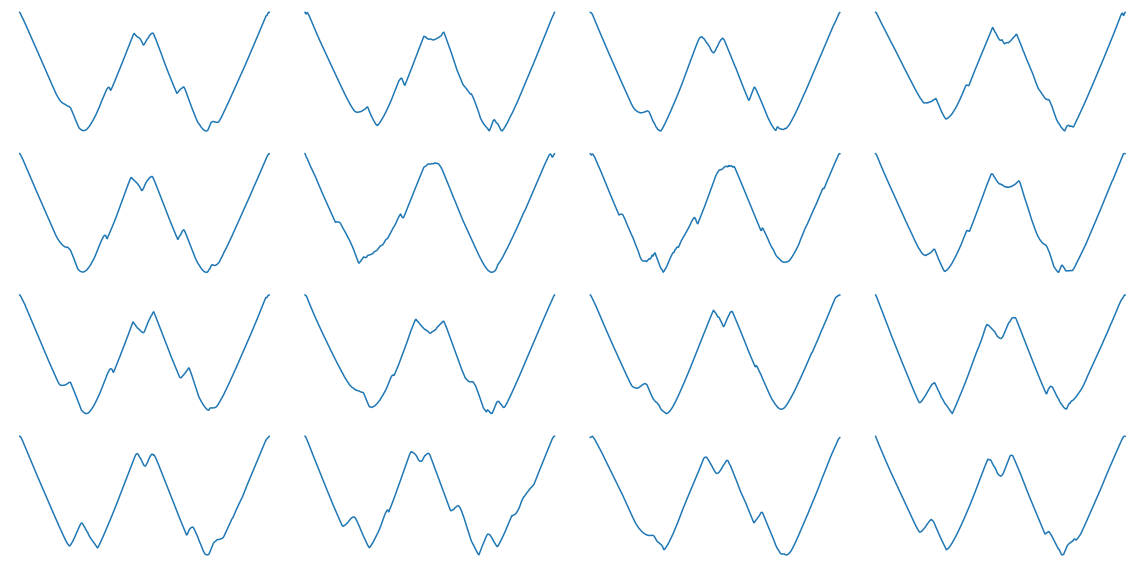

In [154]:
fig = plt.figure(figsize=(16, 8))  # each sample takes an area of 4*2.
n_samples = 16
for i in range(n_samples):
    plt.subplot(4, 4, i + 1)
    plt.plot(batch[i])
    plt.axis('off')
plt.tight_layout()

In [56]:
np.mean(model.generator.layers[1](noise), axis=1)

array([-0.00367637,  0.00091914,  0.00029055,  0.00352518, -0.00053665,
       -0.00230381, -0.00069879,  0.00117676,  0.00019176, -0.00052283,
       -0.00259657, -0.00481528,  0.00165799,  0.00298178, -0.00461798,
       -0.00134294], dtype=float32)

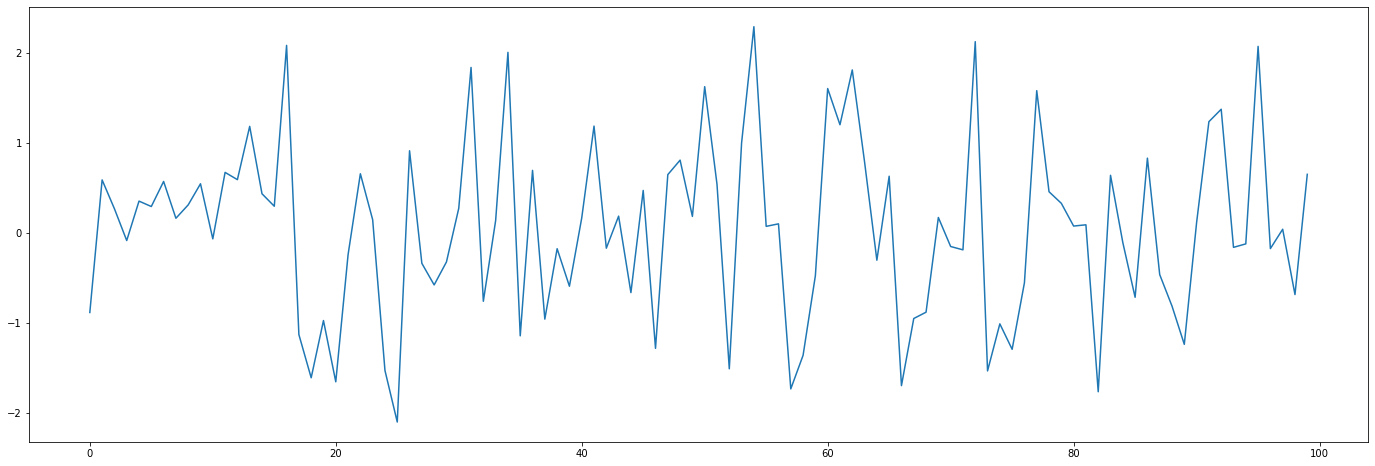

In [151]:
fig = plt.figure(figsize=(24, 8))
plt.plot(noise[0])

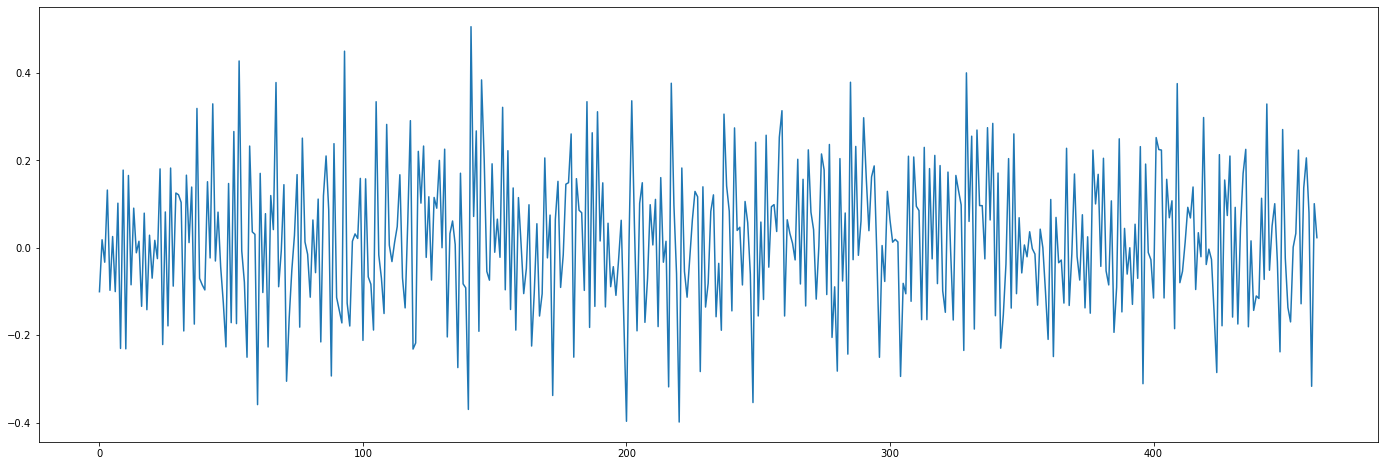

In [152]:
fig = plt.figure(figsize=(24, 8))
plt.plot(generated_samples[0])

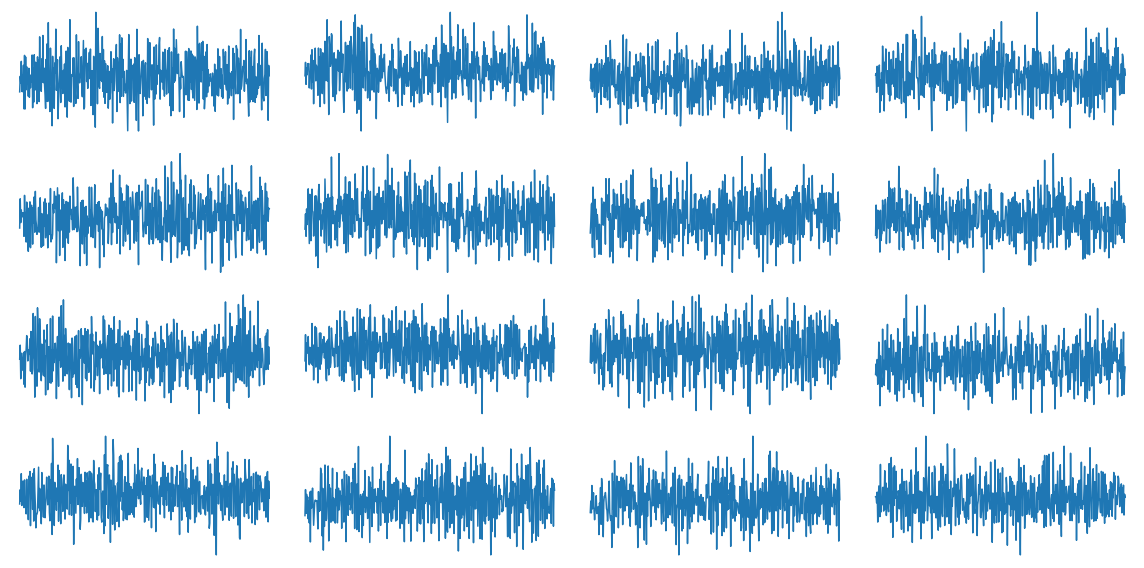

In [153]:
fig = plt.figure(figsize=(16, 8))  # each sample takes an area of 4*2.
n_samples = 16
for i in range(n_samples):
    plt.subplot(4, 4, i + 1)
    plt.plot(generated_samples[i])
    plt.axis('off')
plt.tight_layout()

In [121]:
wei = []
bia = []
for l in model.generator.layers:
    if len(l.weights) > 0:
        wei.append(l.weights[0].numpy().T)
        bia.append(l.weights[1].numpy().T)

In [118]:
with open('generator.pkl', 'wb') as file:
    pickle.dump([wei, bia], file)

In [208]:
with open('generator.pkl', 'rb') as file:
    wei, bia = pickle.load(file)

In [209]:
for i, j in enumerate([1, 2, 5, 6, 8, 9, 11, 12, 14]):
    if j != 2 and j != 6 and j!= 9 and j!=12:
        model.generator.layers[j].set_weights([wei[i].T, bia[i].T])

In [123]:
wei = []
bia = []
for l in model.discriminator.layers:
    if len(l.weights) > 0:
        wei.append(l.weights[0].numpy().T)
        bia.append(l.weights[1].numpy().T)

In [124]:
with open('discriminator.pkl', 'wb') as file:
    pickle.dump([wei, bia], file)

In [170]:
with open('discriminator.pkl', 'rb') as file:
    wei, bia = pickle.load(file)

In [201]:
for i, j in enumerate([1, 4, 7, 8, 11, 12, 16]):
    if j != 8 and j != 12:
        model.discriminator.layers[j].set_weights([wei[i].T, bia[i].T])

# debugging 1

In [213]:
import pickle
model = TCGAN(model_cfg, evaluator)
with open('generator.pkl', 'rb') as file:
    wei, bia = pickle.load(file)
for i, j in enumerate([1, 2, 5, 6, 8, 9, 11, 12, 14]):
    if j != 2 and j != 6 and j!= 9 and j!=12:
        model.generator.layers[j].set_weights([wei[i].T, bia[i].T])
with open('discriminator.pkl', 'rb') as file:
    wei, bia = pickle.load(file)
for i, j in enumerate([1, 4, 7, 8, 11, 12, 16]):
    if j != 8 and j != 12:
        model.discriminator.layers[j].set_weights([wei[i].T, bia[i].T])

In [ ]:
# all_layers = model.generator.layers
layers_to_capture = model.generator.layers
outputs = [layer.output for layer in layers_to_capture]
model_with_intermediate_outputs = tf.keras.Model(inputs=model.generator.input, outputs=outputs)

layer_outputs = model_with_intermediate_outputs(noise, training=True)

# Now layer_outputs is a list of outputs, where each element corresponds to one layer's output
for i, output in enumerate(layer_outputs):
    print(f"Output from layer {i + 1}: {output.shape}")


In [ ]:
# all_layers = model.generator.layers
layers_to_capture = model.discriminator.layers
outputs = [layer.output for layer in layers_to_capture]
model_with_intermediate_outputs = tf.keras.Model(inputs=model.discriminator.input, outputs=outputs)

layer_outputs = model_with_intermediate_outputs(x_tr_gan, training=True)

# Now layer_outputs is a list of outputs, where each element corresponds to one layer's output
for i, output in enumerate(layer_outputs):
    print(f"Output from layer {i + 1}: {output.shape}")


(350, 1)


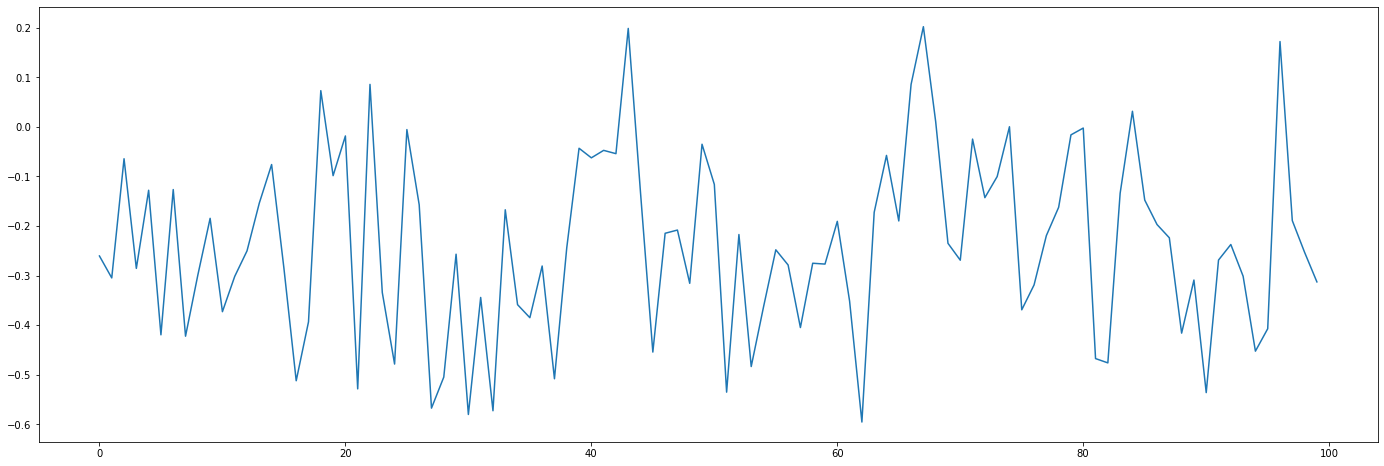

In [334]:
fig = plt.figure(figsize=(24, 8))
i = -1
print(layer_outputs[i].shape)
plt.plot(layer_outputs[i][:100])

In [335]:
def gan_loss(real_logits, fake_logits):
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    # The discriminator's loss quantifies how well it is able to distinguish real images from fakes.
    # It compares the discriminator's predictions on real samples to an array of 1s, and the discriminator's
    # predictions on fake (generated) samples to an array of 0s.
    real_loss = cross_entropy(tf.ones_like(real_logits), real_logits)
    fake_loss = cross_entropy(tf.zeros_like(fake_logits), fake_logits)
    d_loss = real_loss + fake_loss

    # The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator
    # is performing well, the discriminator will classify the fake samples as real (or 1). Here, we will compare the
    # discriminators decisions on the generated samples to an array of 1s.
    g_loss = cross_entropy(tf.ones_like(fake_logits), fake_logits)

    return d_loss, g_loss, real_loss, fake_loss

In [336]:
generated_samples = model.generator(noise, training=True)
batch = x_tr_gan[:16,:,:]

real_logits = model.discriminator(batch, training=True)
fake_logits = model.discriminator(generated_samples, training=True)

d_loss, g_loss, real_loss, fake_loss = gan_loss(real_logits, fake_logits)
d_loss, g_loss, real_loss, fake_loss

(<tf.Tensor: shape=(), dtype=float32, numpy=1.490756>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7240225>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.82456565>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.66619045>)

In [343]:
def gan_accuracy(real_logits, fake_logits):
    real_prob = tf.keras.activations.sigmoid(real_logits)
    fake_prob = tf.keras.activations.sigmoid(fake_logits)
    y_real = tf.ones_like(real_prob)
    y_fake = tf.zeros_like(fake_prob)
    y = tf.concat([y_real, y_fake], axis=0)
    y_pred = tf.concat([real_prob, fake_prob], axis=0)
    acc = tf.reduce_mean(tf.keras.metrics.binary_accuracy(y, y_pred))
    return acc

In [344]:
gan_accuracy(real_logits, fake_logits)

<tf.Tensor: shape=(), dtype=float32, numpy=0.375>